In [1]:
import swarms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

try:
    plt.style.use('paper')
except:
    pass

In [2]:
Mearth = 5.97e24 # kg
Mjup = 318*Mearth # kg
AU = 1.496e11 # m
Rjup = 6.99e7 # m
pc = 3.086e16 # m
Lsun = 3.828e26 # W
Msun = 1.989e30 # kg
Jansky = 1.e-26 # SI

# Swarm
RHO=1500
M0 = 0.1*Mearth; Dt = 100.; Dmax = 250000.;
M_pl = 318 * Mearth; a_pl = 50 * AU; R_pl = Rjup
eta = 0.4; Nstr = 6.; Q = 0.1
age = 1.5e7
g=0.32

star = swarms.Star(L=0.023*Lsun, M=0.44*Msun, T=3700, d=10*pc)

Nout = 40
avals = np.logspace(0, 2.5, Nout)*AU
CRs = np.zeros(Nout)

for i, a in enumerate(avals):
    planet = swarms.Planet(star, M=15*Mearth, R=2.5e7, a=a, Q=0.5)
    swarm = swarms.CollSwarm(star, planet, M0, Dt, Dmax, eta, Nstr, Q, correction=True, alpha=1./1.2, age=age)
    CRs[i] = swarm.CRscat(g)

Text(0,0.5,'Contrast Ratio')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


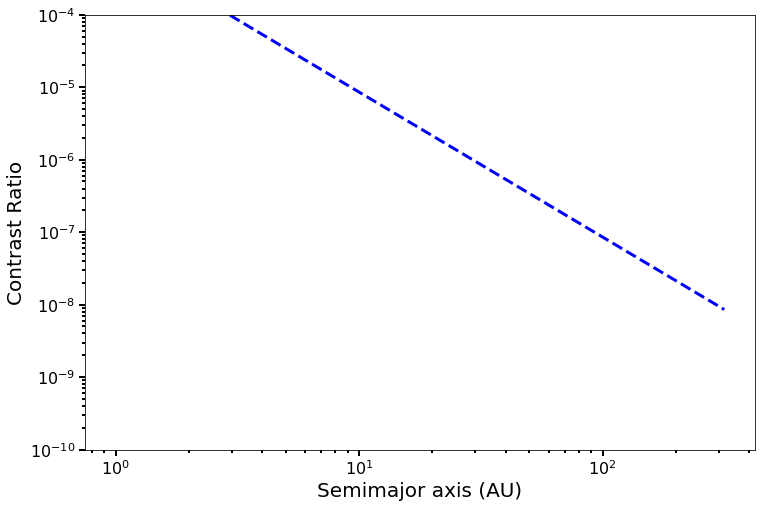

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
#ax.loglog(avals/AU, CRs, 'b')
ax.loglog(avals/AU, CRs[-1]*(avals/avals[-1])**-2, 'b--')
#ax.vlines(swarm.aopt(age)/AU, 1.e-10, 1.e-6, 'r')
ax.set_ylim([1e-10, 1e-4])
ax.set_xlabel('Semimajor axis (AU)')
ax.set_ylabel('Contrast Ratio')

Text(0,0.5,'Contrast Ratio')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


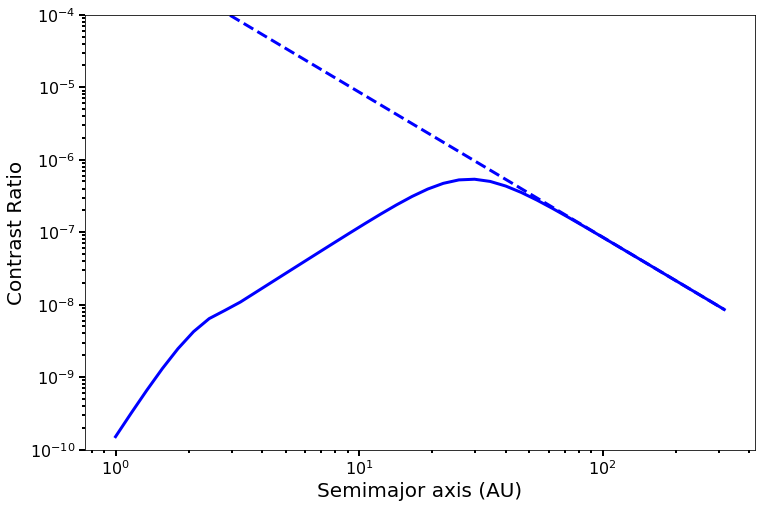

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(avals/AU, CRs, 'b')
ax.loglog(avals/AU, CRs[-1]*(avals/avals[-1])**-2, 'b--')
#ax.vlines(swarm.aopt(age)/AU, 1.e-10, 1.e-6, 'r')
ax.set_ylim([1e-10, 1e-4])
ax.set_xlabel('Semimajor axis (AU)')
ax.set_ylabel('Contrast Ratio')